## Data Sources

[SimFin](https://simfin.com/): US equities only

[SEC](https://www.sec.gov/edgar/searchedgar/companysearch.html): check out interactive data for 10-Q or 10-K forms

In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
quarters = pd.read_csv('./data/KrogersQ.csv')
quarters


,Data provided by SimFin,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Profit & Loss statement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,in million USD,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18,FY '19
3,NaN,Revenue,"76,148","76,609","82,049","90,269","96,619","98,375","108,465","109,830","115,337","122,662","121,162","122,286"
4,NaN,Cost of revenue,"-58,544","-58,848","-63,803","-71,389","-76,726","-78,138","-85,512","-85,496","-89,502","-95,662","-94,894","-95,294"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,Cash From (Repayment of) Debt,-112,-50,-172,276,693,"2,093",226,-349,"1,861","1,431",-457,"-1,141"
62,NaN,Cash From (Repurchase of) Equity,-465,-167,-516,"-1,429","-1,151",-413,"-1,173",-583,"-1,698","-1,582","-1,945",-410
63,NaN,Other Financing Activities,35,21,-66,23,4,0,-3,-21,-86,-87,-57,-46
64,NaN,Cash from Financing Activities,-769,-434,"-1,004","-1,387",-721,"1,361","-1,288","-1,338",-352,-681,"-2,896","-2,083"


In [3]:
# Data Cleaning and formatting

## getting header info
index_PL = quarters.loc[quarters["Data provided by SimFin"] == 'Profit & Loss statement'].index[0] #for profit/loss
index_BS = quarters.loc[quarters["Data provided by SimFin"]=="Balance Sheet"].index[0] #for Balance Sheet
index_CF = quarters.loc[quarters["Data provided by SimFin"]=="Cash Flow statement"].index[0] #for Cash Flow

quarters.replace(',','',regex=True, inplace=True)

#Create Profit/Loss Dataframe
PL = quarters.iloc[index_PL+2:index_BS-1,1:]
PL.columns = quarters.iloc[index_PL+1,1:]
PL.set_index("in million USD", inplace=True)
PL.fillna(0, inplace=True)
PL = PL.astype("int32")


#Create Balance Sheet Dataframe
BS = quarters.iloc[index_BS+2:index_CF-1,1:]
BS.columns = quarters.iloc[index_BS+1,1:]
BS.set_index("in million USD", inplace=True)
BS.fillna(0, inplace=True)
BS = BS.astype("int32")

#Create Cash Flow Dataframe
CF = quarters.iloc[index_CF+2:, 1:]
CF.columns = quarters.iloc[index_CF+1,1:]
CF.set_index("in million USD", inplace=True)
CF.fillna(0, inplace=True)
BS = BS.astype("int32")

PL.T


in million USD,Revenue,Cost of revenue,Gross Profit,Operating Expenses,Operating Income (Loss),Non-Operating Income (Loss),Pretax Income (Loss) Adjusted,Abnormal Gains (Losses),Pretax Income (Loss),Income Tax (Expense) Benefit net,Income (Loss) Including Minority Interest,Minority Interest,Net Income Available to Common Shareholders
2,,,,,,,,,,,,,
FY '08,76148,-58544,17604,-15152,2452,-485,1967,0,1967,-717,1250,-1,1249
FY '09,76609,-58848,17761,-15557,2204,-502,1702,-1113,589,-532,57,13,70
FY '10,82049,-63803,18246,-16046,2200,-448,1752,-18,1734,-601,1133,-17,1116
FY '11,90269,-71389,18880,-17602,1278,-435,843,0,843,-247,596,6,602
FY '12,96619,-76726,19893,-17129,2764,-462,2302,0,2302,-794,1508,-11,1497
FY '13,98375,-78138,20237,-17512,2725,-443,2282,0,2282,-751,1531,-12,1519
FY '14,108465,-85512,22953,-19816,3137,-488,2649,0,2649,-902,1747,-19,1728
FY '15,109830,-85496,24334,-20758,3576,-482,3094,0,3094,-1045,2049,-10,2039
FY '16,115337,-89502,25835,-22399,3436,-522,2914,0,2914,-957,1957,18,1975


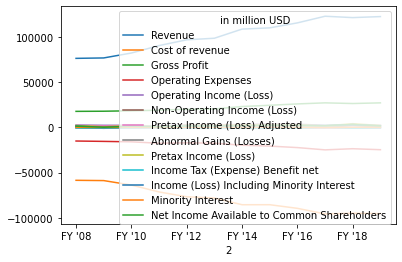

In [4]:
PL.T.plot()